In [1]:
using PyPlot
using Random

In [2]:
Problem = 1

1

In [3]:
S=2000 # number of points on the spiral
rate=25 # angular rate of spiral
sd=0.2 # standard deviation of the sensor Gaussian noise
# number of sensors
N=30 
## number of earthquakes
K = 2

2

In [4]:
## read the observed values file

if(Problem==1)
    observed_values_file = "EarthquakeExerciseData.txt"
end

if(Problem==2)
    observed_values_file = "EarthquakeExerciseMeanData.txt" 
end
    
observed_val=zeros(N)

index = 1
observed_values = open(observed_values_file, "r")
for line in eachline(observed_values)
    observed_val[index]  = parse(Float64,line)
    index += 1
end
close(observed_values)
print(observed_val)

[1.5575865910322284, 2.0316965014178545, 2.527159472728958, 2.6723924798859993, 3.0556883949222513, 3.226100565264301, 3.413836775759006, 2.934969359401483, 2.574515504193705, 2.6488388964756617, 2.9253870488198985, 3.1964831294088745, 4.565820133697982, 7.400903824656596, 9.633267837723208, 7.016102363491975, 4.508193821658606, 2.7329525442253204, 1.7254938107215634, 1.4010698300325652, 1.4277427130171043, 0.8691896336292224, 1.2026529289752554, 0.5831154459014418, 1.1207179346239071, 1.0105518841821948, 0.8807933908444603, 0.8835180770749729, 1.0899061329336812, 1.2699960898845595]

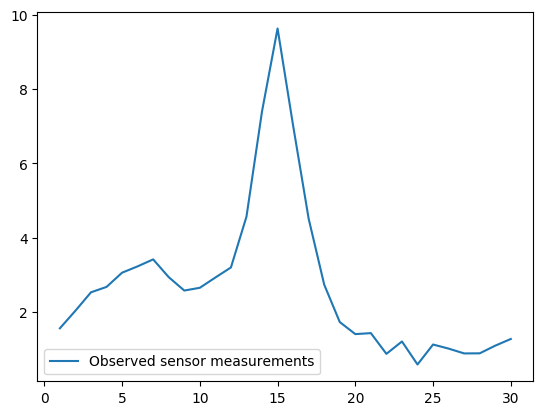

PyObject <matplotlib.legend.Legend object at 0x7f8b2e77a748>

In [5]:
figure()
plot(1:N,observed_val,label="Observed sensor measurements")
legend()

In [6]:
function value(x1_true,y1_true,x2_true,y2_true,x_sensor,y_sensor,flag)
    
    value = 0
    
    if flag==1
        value = 1/(0.1+ (x1_true-x_sensor)^2 + (y1_true-y_sensor)^2) + 1/(0.1 + (x2_true-x_sensor)^2 + (y2_true-y_sensor)^2)
    end
    
    if flag==2
        value =  0.5/(0.1+ (x1_true-x_sensor)^2 + (y1_true-y_sensor)^2) + 1/(0.1 + (x2_true-x_sensor)^2 + (y2_true-y_sensor)^2)
    end  
    
    return value
end

value (generic function with 1 method)

In [7]:
## value function for a single explosion
function single_value(x_true,y_true,x_sensor,y_sensor,flag)
    
    value = 0
    
    if flag==1
        value = 1/(0.1+ (x_true-x_sensor)^2 + (y_true-y_sensor)^2)
    end
    
    if flag==2
        value = 0.5/(0.1+ (x_true-x_sensor)^2 + (y_true-y_sensor)^2)
    end
    
    return value
    
end

single_value (generic function with 1 method)

In [8]:
function earthquake_exercise_setup()
    
    # define the coordinate system:
    # explosion detector (using spiral coordinate system)

    x=zeros(S); y=zeros(S)
    for s=1:S
        theta=rate*2*pi*s/S;  r=s/S
        x[s]=r*cos(theta); y[s]=r*sin(theta)
    end
    
    ## visulalisation of out coordinate spiral system
    plot(x,y,".")

    
    # define the locations of the detection stations on the surface
    # Also define what value on each sensor would be generated by an explostion at internal location s

    x_sensor=zeros(N)
    y_sensor=zeros(N)
    
    v=zeros(S,S,N)
    single_v = zeros(S,N)
    
    for sensor=1:N
        
        theta_sensor=2*pi*sensor/N
        x_sensor[sensor]=cos(theta_sensor)
        y_sensor[sensor]=sin(theta_sensor)

        for s_1=1:S
            for s_2=1:S
                ## explosion value for two earthquakes
                v[s_1,s_2,sensor]=value(x[s_1],y[s_1],x[s_2],y[s_2],x_sensor[sensor],y_sensor[sensor],Problem)
            end
        end
        
        
        for s=1:S
            single_v[s,sensor]=single_value(x[s],y[s],x_sensor[sensor],y_sensor[sensor],Problem)
        end
        
        
    end
    
    return x,y,x_sensor,y_sensor,v,single_v
    
end

earthquake_exercise_setup (generic function with 1 method)

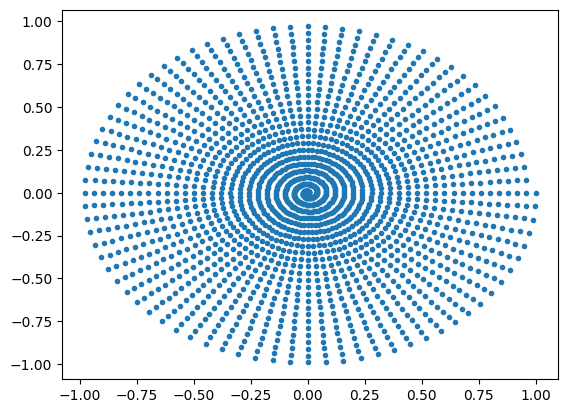

([0.0004984586668665639, 0.0009876883405951378, 0.001458554880596515, 0.0019021130325903072, 0.002309698831278217, 0.002673019572565104, 0.0029842405752393227, 0.00323606797749979, 0.003421826845200139, 0.0035355339059327372  …  0.7569841387548312, 0.8057809263974461, 0.84965592377885, 0.8883335046157989, 0.9215698336800149, 0.9491544032625674, 0.9709113655170759, 0.9867006522545437, 0.9964188750662618, 1.0], [3.9229547863922476e-5, 0.00015643446504023088, 0.0003501680457838581, 0.0006180339887498948, 0.0009567085809127246, 0.0013619714992186402, 0.0018287449765058213, 0.0023511410091698924, 0.0029225162174858262, 0.003535533905932738  …  -0.6465255321126975, -0.5854341112833052, -0.5206698197394479, -0.45262852824033595, -0.38172672378416184, -0.30839896038618475, -0.23309519581013916, -0.15627803057518355, -0.07841986617997694, 9.82193361864236e-16], [0.9781476007338057, 0.9135454576426009, 0.8090169943749475, 0.6691306063588582, 0.5000000000000001, 0.30901699437494745, 0.10452846326

In [9]:
x,y,x_sensor,y_sensor,v,single_v = earthquake_exercise_setup()

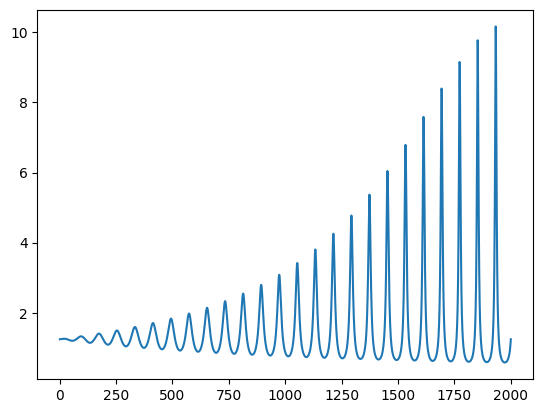

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8ab7adaf98>

In [10]:
index=zeros(S)
for s=1:S
    index[s] = s
end

index_sensor=zeros(N)
for n=1:N
    index_sensor[n] = n
end

plot(index,v[:,1500,5])

In [11]:
print(size(x))
print(size(y))
print(size(x_sensor))
print(size(y_sensor))
print(size(v))

(2000,)(2000,)(30,)(30,)(2000, 2000, 30)

In [12]:
function get_earthquake_coords(K)
    
    ## get the coorddinates of K earthquakes
    
    x_true=zeros(K)
    y_true=zeros(K)
    for index=1:K
        true_s=randperm(S)[K]
        theta=50*2*pi*true_s/S
        r=true_s/S
        x=r*cos(theta)
        y=r*sin(theta)
        x_true[index] = x
        y_true[index] = y
        
    end
    
    return x_true,y_true
    
end

get_earthquake_coords (generic function with 1 method)

In [13]:
x_true,y_true = get_earthquake_coords(K)

([-0.380297058233225, -0.0039890788585259015], [0.5234339953605947, 0.02518605268517601])

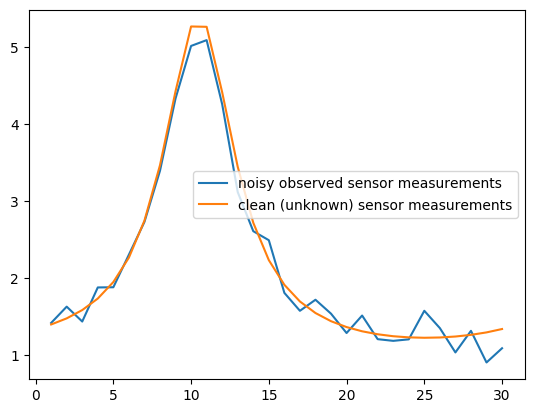

PyObject <matplotlib.legend.Legend object at 0x7f8ab794d2b0>

In [14]:
# Get the noisy sensor values that will be observed for this explosion:
val=zeros(N)
val_clean=zeros(N) # unknown clean values (just for interest)
for sensor=1:N
    val_clean[sensor]=value(x_true[1],y_true[1],x_true[2],y_true[2],x_sensor[sensor],y_sensor[sensor],Problem)
    val[sensor]=val_clean[sensor]+sd*randn()
end

figure()
plot(1:N,val,label="noisy observed sensor measurements")
plot(1:N,val_clean,label="clean (unknown) sensor measurements")
legend()

In [15]:
# Perform inference p(location|observed sensor values) given these sensor values
logp=zeros(S)

for s2=1:S
    temp=zeros(S)
    for sensor=1:N
        temp += (-0.5.*(v[:,s2,sensor] .- observed_val[sensor]).^2)./(sd^2)
    end
    
    logp += temp
end

## ormalization
p1 = logp./sum(logp)

## exponentiation and normalization
p2=exp.(logp .- maximum(logp)) # do exponentiation (and avoid over/underflow)
p2=p2/sum(p2) # normalise

2000-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
index=zeros(S)
for s=1:S
    index[s] = s
end

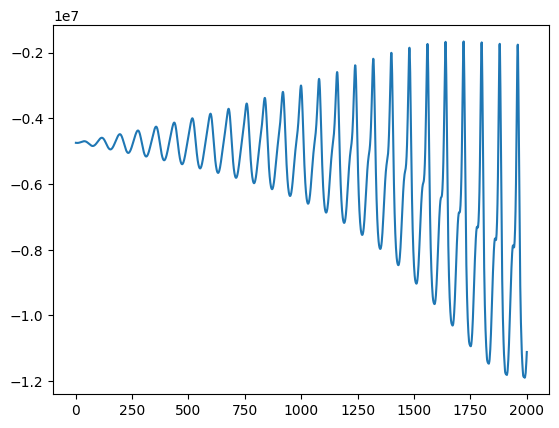

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8ab792dc18>

In [17]:
plot(index,logp)

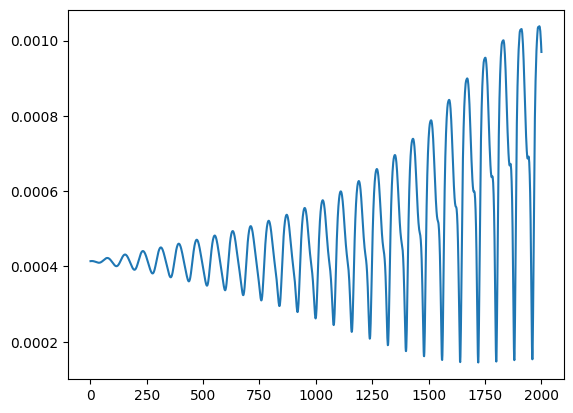

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8ab7895e48>

In [18]:
plot(index,p1)

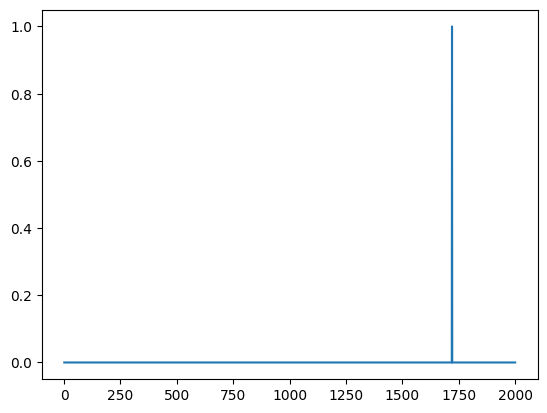

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8ab787dcf8>

In [19]:
plot(index,p2)

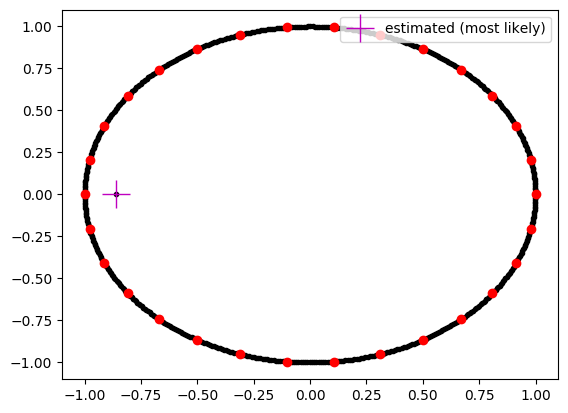

PyObject <matplotlib.legend.Legend object at 0x7f8ab5a656d8>

In [20]:
maxp,maxind = findmax(p2)

figure()
for s=1:S
plot(x[s],y[s],".",color=(1-(p2[s]/maxp))*[1,1,1])
end
for theta=0:0.01:2*pi
plot(cos(theta),sin(theta),".",color=[0,0,0])
end
for sensor=1:N
plot(x_sensor[sensor],y_sensor[sensor],"o",color=[1,0,0])
end

plot(x[maxind],y[maxind],"m+",markersize=20,label="estimated (most likely)")

legend()

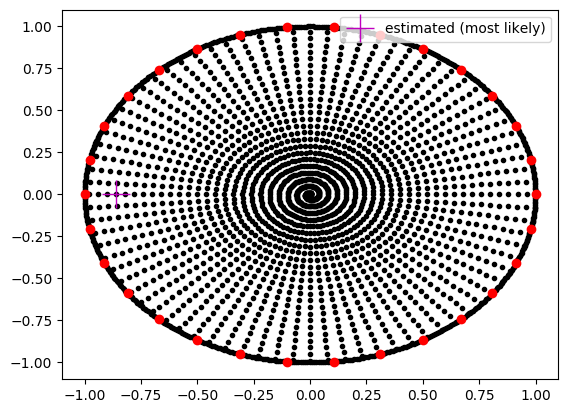

PyObject <matplotlib.legend.Legend object at 0x7f8ab39f3470>

In [21]:
minp,minind = findmin(p1)

figure()
for s=1:S
plot(x[s],y[s],".",color=((p1[s]/maxp))*[1,1,1])
end
for theta=0:0.01:2*pi
plot(cos(theta),sin(theta),".",color=[0,0,0])
end
for sensor=1:N
plot(x_sensor[sensor],y_sensor[sensor],"o",color=[1,0,0])
end

plot(x[minind],y[minind],"m+",markersize=20,label="estimated (most likely)")

legend()

In [22]:
## question2 compute log{P(v|H2)} -- is the numerator -- hypothsis that we have two earthquakes
log_H2 = 0
for s1=1:S
    for s2=1:S
        for sensor=1:N
            log_H2 += (-0.5.*(v[s1,s2,sensor] .- observed_val[sensor]).^2)./(sd^2)
        end
    end
end

In [23]:
## denominator pH2
#pH2 = 0
#for s1=1:S
#    for s2=1:S
#        for sensor=1:N
#            pH2 += v[s1,s2,sensor]
#        end
#    end
#end

In [24]:
## question2 compute log{P(v|H1)} -- is the numerator -- hypothsis that i have one earthquake
log_H1 = 0
for s1=1:S
    for sensor=1:N
        log_H1 += (-0.5.*(single_v[s1,sensor] .- observed_val[sensor]).^2)./(sd^2)
    end
end

In [25]:
## denominator pH1
#pH1 = 0
#for s1=1:S
#    for sensor=1:N
#        pH1 += single_v[s1,sensor]
#    end
#end

In [26]:
print(log_H2)

-1.146397925584147e10

In [27]:
print(((1/S)^2)*log_H2)

-2865.9948139603675

In [28]:
print(log_H1)

-6.255730359413821e6

In [29]:
print((1/S)log_H1)

-3127.8651797069106

In [34]:
print(exp(log_H2))

0.0

In [39]:
print(log10(((1/S)^2)*exp(BigFloat(log_H2))) - log10((1/S)exp(BigFloat(log_H1))))

-4.976026105590959885730087635961837971902389900698370619140051664965960543002332e+09

In [40]:
res = log10(((1/S)^2)*exp(BigFloat(log_H2))) - log10((1/S)exp(BigFloat(log_H1)))

-4.976026105590959885730087635961837971902389900698370619140051664965960543002332e+09

In [42]:
round(res, digits=7)

-4.976026105590959900000000000000000000000000000000000000000000000000000000000013e+09

In [31]:
print(log_H2 - log_H1)

-1.1457723525482058e10

In [32]:
print(log_H2 > log_H1)

false

In [35]:
typeof(log_H2)

Float64

In [36]:
m = BigFloat(log_H2)

-1.14639792558414707183837890625e+10

In [37]:
exp(m)

3.425327025335579796797015247380758950686434267809865344466517310306536877164897e-4978742932